# Bank Data Analysis

# Objective

In this case study, you will be working on Banking Data Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to give you hands-on experience in analyzing large-scale banking datasets using PySpark and AWS services. You will apply techniques learned in data analytics to clean, transform, and explore banking data, drawing meaningful insights to support financial decision-making. Apart from understanding how big data tools can optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing market capitalization trends, currency conversions, and global banking performance. Additionally, you will use AWS S3 to store the processed data once the ETL pipeline is complete, ensuring efficient data management and retrieval.


# Business Value

The banking industry operates in a highly competitive and globalized market where financial institutions must continuously monitor their market position, performance, and currency fluctuations. To stay competitive, banks must leverage data-driven insights to optimize their financial strategies, assess market trends, and make informed decisions. In this assignment, you will analyze banking data to uncover patterns in market capitalization, currency conversions, and global rankings. With Apache Spark's ability to handle large datasets efficiently, financial institutions can process vast amounts of data in real-time, helping them make faster and more informed decisions.


As an analyst at a financial institution, your task is to examine historical banking data to derive actionable insights that can drive strategic growth. Your analysis will help identify the top 10 largest banks by market capitalization, convert market cap values into multiple currencies (USD, GBP, EUR, INR), and store the processed data for easy retrieval. To enhance scalability and accessibility, you will utilize AWS S3 for data storage, ensuring seamless integration with cloud-based analytics tools. By leveraging big data analytics and cloud services, financial institutions can streamline operations, enhance decision-making, and maximize revenue opportunities.


# Dataset

The data for this project can be accessed from the following [wikipedia link](https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks).

The dataset used in this analysis comprises global banking data extracted from a Wikipedia page (List of Largest Banks) archived as of September 2023.

It includes rankings of the world's largest banks based on market capitalization (in USD billions) and is structured into a single table with three columns. The data was scraped programmatically, cleaned, and transformed using PySpark to support cross-currency analysis. Exchange rate data (for USD, GBP, EUR, and INR) was sourced from a CSV file to enable currency conversions. The processed dataset is stored in CSV and SQLite formats for accessibility and efficient querying.

The dataset consists of a single table (Largest_banks) with the following three key attributes:
- **Rank:** Numerical position of the bank based on market capitalization.
- **Bank Name:** Name of the financial institution.
- **Market Cap (USD Billion):** Market valuation of the bank in USD billions.
This dataset enables analysis of global banking trends, cross-currency valuations, and the relative market dominance of financial institutions.

An additional data on market exchange rates is available to compare the marketcap dealing with different currencies.


<h2>Assignment Tasks</h2>

<ol>
    <li>
        <strong>Data Preparation</strong>
        <p>The dataset consists of a structured table containing global banking data. Before performing any analysis, it is crucial to prepare the data to ensure consistency and efficiency in processing.</p>
        Check for data consistency and ensure all columns are correctly formatted.<br>
        Structure and prepare the data for further processing and analysis.<br>
</br>
    <li>
        <strong>Data Cleaning</strong>
        <ul>
            2.1. <strong>Handling Missing Values:</strong> Decide on an approach to handle missing data (e.g., imputation or removal). Mention the approach in your report.<br>
            2.2. <strong>Fixing Columns:</strong> Ensure all columns are properly named and formatted.<br>
            2.3. <strong>Handling Outliers:</strong> Identify outliers in the dataset and explain why they are considered outliers. It is not necessary to remove them for this task, but mention your approach for handling them.<br>
        </ul>
</br>
    <li>
        <strong>Exploratory Data Analysis:</strong></br>
            EDA Finding Patterns - Analyze the dataset and find patterns based on the following points:
                <ul>
                    3.1. Convert PySpark DataFrame to Pandas DataFrame for visualization.<br>
                    3.2. Analyze the distribution of market capitalization using a histogram.<br>
                    3.3. Identify the top 10 banks by market capitalization using a bar chart.<br>
                    3.4. Visualize the relationship between market capitalization and bank ranking using a scatter plot.<br>
                    3.5. Use a boxplot to examine the spread and outliers in market capitalization.<br>
                    3.6. Display the quartile distribution of market capitalization using a violin plot.<br>
                    3.7. Compute cumulative market share and visualize it with a line plot.<br>
                    3.8. Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.<br>
                    3.9. Calculate and display market share distribution of top 10 banks using a pie chart.<br>
                </ul>
        </ul>
</br>
    <li>
        <strong>Banking Data ETL Querying</strong>
        <ul>
            4.1. Perform Advanced Market Capitalization Analysis with Growth Metrics.<br>
            4.2. Analyze Market Concentration and Categorize Banks Based on Market Share Tiers.<br>
            4.3. Examine Statistical Distribution of Market Capitalization Using Quartile Analysis.<br>
            4.4. Conduct Comparative Size Analysis to Classify Banks by Relative Market Size.<br>
            4.5. Evaluate Market Growth and Identify Gaps Between Consecutive Banks.<br>
            4.6. Assess Market Dominance by Measuring Cumulative Share and Dominance Score.<br>
            4.7. Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges.<br>
            4.8. Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics.<br>
        </ul>
    </br>
    <li>
        <strong>Conclusion</strong></br>
            Provide final insights and recommendations based on the analysis:</br>
            <ul>
            5.1 Recommendations to optimize inventory management based on product demand patterns and sales trends.</br>
            5.2 Suggestions to improve customer retention by identifying repeat buyers and implementing targeted engagement strategies.</br>
            5.3 Propose data-driven pricing and discount strategies to maximize revenue while maintaining competitive pricing.</br>
            5.4 Identify potential geographic expansion opportunities by analyzing regional sales performance and customer demand.</br>
            5.5 Conclude the analysis by summarizing key findings and business implications.<br>
            5.6 Explain the results of univariate, segmented univariate, and bivariate analyses in business terms.<br>
            5.7 Include visualizations and summarize the most important results in the report. Insights should explain why each variable is important and how they can influence traffic safety policies and urban planning.<br>
            </ul>
    </br>
    <li>
        <strong>Visualization Integration [Optional]</strong>
        <p>Enhance the project by incorporating a visualization component that connects the processed data stored in an S3 bucket to a business intelligence tool such as Tableau or Power BI. This involves setting up the connection between the S3 bucket and the chosen visualization tool, importing the processed dataset for analysis and visualization, creating interactive dashboards to explore key trends and insights and ensuring data updates are reflected dynamically in the visualization tool.<br>
        </ul>
</ol>

Import Required Libraries

In [ ]:
# # Install the required libraries
# !pip install --quiet pyspark==3.5.4 pandas==2.2.2

In [11]:
# Import required libraries
import logging
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# Import PySpark libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round, count, when, isnull, mean, stddev, min, max

print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

pandas version: 2.2.2
matplotlib version: 3.10.5
seaborn version: 0.13.2


In [2]:
# Initialize Spark session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()
spark.version

25/08/23 23:22:49 WARN Utils: Your hostname, abinas resolves to a loopback address: 127.0.1.1; using 192.168.0.249 instead (on interface wlp0s20f3)
25/08/23 23:22:49 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/23 23:22:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


'3.5.4'

#**1. Data Preparation** <font color = red>[5 marks]</font> <br>


The data for this project can be accessed from the wikipedia link provided above. The page features data regarding global banking data.

Utilise the pandas method to read tables from the html document
and extract the requried data consists of a structured format.

Before performing any analysis, it is crucial to prepare the data to ensure consistency, and efficiency in processing.

In [3]:
# URL of the Wikipedia page
url = "https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks"

# Use pandas to read all HTML tables from the page
tables = pd.read_html(url)
print(f"Number of tables found: {len(tables)}")
for i, table in enumerate(tables):
  print(f"Table {i}: Shape {table.shape}")
  print(f"Columns: {table.columns.tolist()}")
  print("--------------------------------")

Number of tables found: 4
Table 0: Shape (3, 3)
Columns: [0, 1, 2]
--------------------------------
Table 1: Shape (10, 3)
Columns: ['Rank', 'Bank name', 'Market cap (US$ billion)']
--------------------------------
Table 2: Shape (100, 3)
Columns: ['Rank', 'Bank name', 'Total assets (2022) (US$ billion)']
--------------------------------
Table 3: Shape (25, 3)
Columns: ['Rank', 'Country', 'Number']
--------------------------------


25/08/23 23:23:02 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [4]:
# Logging 
logging.basicConfig(
  level=logging.INFO,
  format='%(asctime)s - %(levelname)s - %(message)s',
  handlers=[
    logging.FileHandler('analysis_log.txt'),
    logging.StreamHandler()
  ]
)
logger = logging.getLogger(__name__)
logger.info("Starting Bank Data Analysis")

2025-08-23 23:23:05,971 - INFO - Starting Bank Data Analysis


In [5]:
# Load the correct table (Table 1)
bank_data = tables[1]
print(bank_data.head())

# Convert pandas DataFrame to PySpark DataFrame
bank_spark_df = spark.createDataFrame(bank_data)

# Rename columns
bank_spark_df = bank_spark_df.withColumnRenamed("Rank", "Rank") \
                              .withColumnRenamed("Bank name", "Bank_Name") \
                                .withColumnRenamed("Market cap (US$ billion)", "Market_Cap_USD_Billion")
# Show the first few rows of the PySpark DataFrame
bank_spark_df.show(10)

# Print the schema of the DataFrame
bank_spark_df.printSchema()

# Configure logging
logger.info("Data loading from Wikipedia completed successfully.")

   Rank                                Bank name  Market cap (US$ billion)
0     1                           JPMorgan Chase                    432.92
1     2                          Bank of America                    231.52
2     3  Industrial and Commercial Bank of China                    194.56
3     4               Agricultural Bank of China                    160.68
4     5                                HDFC Bank                    157.91


2025-08-23 23:23:31,208 - INFO - Data loading from Wikipedia completed successfully.


+----+--------------------+----------------------+
|Rank|           Bank_Name|Market_Cap_USD_Billion|
+----+--------------------+----------------------+
|   1|      JPMorgan Chase|                432.92|
|   2|     Bank of America|                231.52|
|   3|Industrial and Co...|                194.56|
|   4|Agricultural Bank...|                160.68|
|   5|           HDFC Bank|                157.91|
|   6|         Wells Fargo|                155.87|
|   7|   HSBC Holdings PLC|                 148.9|
|   8|      Morgan Stanley|                140.83|
|   9|China Constructio...|                139.82|
|  10|       Bank of China|                136.81|
+----+--------------------+----------------------+

root
 |-- Rank: long (nullable = true)
 |-- Bank_Name: string (nullable = true)
 |-- Market_Cap_USD_Billion: double (nullable = true)



Load the data for exchange rates

In [6]:
# Load the exchange rate data
exchange_rate = pd.read_csv('exchange_rate.csv')
exchange_rate

# Show the first few rows of the exchange rate data to verify
# Adding USD as base currency
usd_row = pd.DataFrame({'Currency': ['USD'], 'Rate': [1.0]})
exchange_rate_final = pd.concat([usd_row, exchange_rate], ignore_index=True)

# Convert to Pyspark Dataframe
exchange_rate_spark = spark.createDataFrame(exchange_rate_final)
exchange_rate_spark.show()
exchange_rate_spark.printSchema()

logger.info("Exchange rate data loaded successfully")


2025-08-23 23:23:41,264 - INFO - Exchange rate data loaded successfully


+--------+-----+
|Currency| Rate|
+--------+-----+
|     USD|  1.0|
|     EUR| 0.93|
|     GBP|  0.8|
|     INR|82.95|
+--------+-----+

root
 |-- Currency: string (nullable = true)
 |-- Rate: double (nullable = true)



#**2. Data Cleaning** <font color = red>[20 marks]</font> <br>

##**2.1 Handle Missing Values** <font color = red>[10 marks]</font> <br>


In [7]:
# Print the schema to check data types
logger.info("Data Types and Structure Analysis")
bank_spark_df.printSchema()
logger.info(f"Total rows in dataset: {bank_spark_df.count()}")
logger.info(f"Total columns: {len(bank_spark_df.columns)}")

logger.info("Complete Dataset - Visual Inspection")
bank_spark_df.show(truncate=False)

2025-08-23 23:23:44,844 - INFO - Data Types and Structure Analysis


root
 |-- Rank: long (nullable = true)
 |-- Bank_Name: string (nullable = true)
 |-- Market_Cap_USD_Billion: double (nullable = true)



2025-08-23 23:23:46,113 - INFO - Total rows in dataset: 10                      
2025-08-23 23:23:46,152 - INFO - Total columns: 3
2025-08-23 23:23:46,155 - INFO - Complete Dataset - Visual Inspection


+----+---------------------------------------+----------------------+
|Rank|Bank_Name                              |Market_Cap_USD_Billion|
+----+---------------------------------------+----------------------+
|1   |JPMorgan Chase                         |432.92                |
|2   |Bank of America                        |231.52                |
|3   |Industrial and Commercial Bank of China|194.56                |
|4   |Agricultural Bank of China             |160.68                |
|5   |HDFC Bank                              |157.91                |
|6   |Wells Fargo                            |155.87                |
|7   |HSBC Holdings PLC                      |148.9                 |
|8   |Morgan Stanley                         |140.83                |
|9   |China Construction Bank                |139.82                |
|10  |Bank of China                          |136.81                |
+----+---------------------------------------+----------------------+



In [8]:
# Check for missing values
logger.info("Missing Values Analysis")

# Count missing values per column
for column in bank_spark_df.columns:
  null_count = bank_spark_df.filter(col(column).isNull()).count()
  empty_count = bank_spark_df.filter(col(column) == "").count()
  total_count = bank_spark_df.count()
  
  logger.info(f"{column}:")
  logger.info(f"  - Null values: {null_count}/{total_count}")
  logger.info(f"  - Empty strings: {empty_count}/{total_count}")
  logger.info(f"  - Missing percentage: {(null_count + empty_count)/total_count*100:.1f}%")

# Document findings and approach for assignment
logger.info("MISSING VALUES ANALYSIS SUMMARY")
logger.info("Finding: No missing values detected in the dataset")
logger.info("1. Verified data completeness through both visual and programmatic inspection")
logger.info("2. Wikipedia source data is typically curated and clean")
logger.info("3. Small dataset size (10 records) allows for complete verification")

2025-08-23 23:23:53,661 - INFO - Missing Values Analysis
2025-08-23 23:23:55,658 - INFO - Rank:                                          
2025-08-23 23:23:55,661 - INFO -   - Null values: 0/10
2025-08-23 23:23:55,663 - INFO -   - Empty strings: 0/10
2025-08-23 23:23:55,666 - INFO -   - Missing percentage: 0.0%
2025-08-23 23:23:57,824 - INFO - Bank_Name:
2025-08-23 23:23:57,826 - INFO -   - Null values: 0/10
2025-08-23 23:23:57,830 - INFO -   - Empty strings: 0/10
2025-08-23 23:23:57,832 - INFO -   - Missing percentage: 0.0%
2025-08-23 23:23:59,233 - INFO - Market_Cap_USD_Billion:
2025-08-23 23:23:59,236 - INFO -   - Null values: 0/10
2025-08-23 23:23:59,238 - INFO -   - Empty strings: 0/10
2025-08-23 23:23:59,240 - INFO -   - Missing percentage: 0.0%
2025-08-23 23:23:59,243 - INFO - MISSING VALUES ANALYSIS SUMMARY
2025-08-23 23:23:59,245 - INFO - Finding: No missing values detected in the dataset
2025-08-23 23:23:59,247 - INFO - 1. Verified data completeness through both visual and pro

In [9]:
# Drop rows with missing values
logger.info("No missing values in banking data")

2025-08-23 23:24:12,547 - INFO - No missing values in banking data


##**2.2 Fixing Columns** <font color = red>[5 marks]</font> <br>


The Market cap is already in numeric so no conversion needed.

In [10]:
# Count the total number of rows
total_rows = bank_spark_df.count()
logger.info(f"Total number of rows: {total_rows}")

# Check if there are duplicates
duplicate_count = bank_spark_df.count() - bank_spark_df.dropDuplicates().count()
logger.info(f"Number of duplicate rows: {duplicate_count}")

# Verify column names and data types are properly formatted
logger.info("\nColumn verification:")
logger.info("Rank: Integer type - properly formatted")
logger.info("Bank_Name: String type - properly formatted") 
logger.info("Market_Cap_USD_Billion: Double type - already numeric, no conversion needed")



2025-08-23 23:24:32,576 - INFO - Total number of rows: 10
2025-08-23 23:24:34,673 - INFO - Number of duplicate rows: 0
2025-08-23 23:24:34,676 - INFO - 
Column verification:
2025-08-23 23:24:34,681 - INFO - Rank: Integer type - properly formatted
2025-08-23 23:24:34,684 - INFO - Bank_Name: String type - properly formatted
2025-08-23 23:24:34,686 - INFO - Market_Cap_USD_Billion: Double type - already numeric, no conversion needed


##**2.3 Handle Outliers** <font color = red>[5 marks]</font> <br>


In [ ]:
# Write code for outlier analysis
logger.info("OUTLIER ANALYSIS - Market Capitalization")

# Calculate statistics using PySpark
from pyspark.sql.functions import col, mean, stddev, min, max, count

stats = bank_spark_df.select(
    mean(col("Market_Cap_USD_Billion")).alias("mean"),
    stddev(col("Market_Cap_USD_Billion")).alias("stddev"),
    min(col("Market_Cap_USD_Billion")).alias("min"),
    max(col("Market_Cap_USD_Billion")).alias("max")
).collect()[0]


logger.info(f"Market Cap Statistics:")
logger.info(f"Mean: ${stats['mean']:.2f} billion")
logger.info(f"Std Dev: ${stats['stddev']:.2f} billion")
logger.info(f"Min: ${stats['min']:.2f} billion")
logger.info(f"Max: ${stats['max']:.2f} billion")


logger.info("\nAll banks by Market Cap:")
bank_spark_df.orderBy(col("Market_Cap_USD_Billion").desc()).show(truncate=False)

threshold = stats['mean'] + 2 * stats['stddev']
logger.info(f"\nOutlier threshold (Mean + 2*StdDev): ${threshold:.2f} billion")

outliers = bank_spark_df.filter(col("Market_Cap_USD_Billion") > threshold)
outlier_count = outliers.count()

logger.info(f"Outliers detected: {outlier_count}")
if outlier_count > 0:
    logger.info("Outlier banks:")
    outliers.show(truncate=False)

logger.info("OUTLIER HANDLING APPROACH:")
logger.info("1. JPMorgan Chase appears to be an outlier due to its dominant market position")
logger.info("2. This represents genuine market reality, not a data error") 
logger.info("3. DECISION: Kept all data points as they provide valuable business insights")
logger.info("4. These outliers are essential for understanding market concentration")


2025-08-23 23:32:33,823 - INFO - OUTLIER ANALYSIS - Market Capitalization
2025-08-23 23:32:34,464 - INFO - Market Cap Statistics:
2025-08-23 23:32:34,466 - INFO - Mean: $189.98 billion
2025-08-23 23:32:34,469 - INFO - Std Dev: $90.22 billion
2025-08-23 23:32:34,471 - INFO - Min: $136.81 billion
2025-08-23 23:32:34,474 - INFO - Max: $432.92 billion
2025-08-23 23:32:34,478 - INFO - 
All banks by Market Cap:
2025-08-23 23:32:35,068 - INFO - 
Outlier threshold (Mean + 2*StdDev): $370.43 billion


+----+---------------------------------------+----------------------+
|Rank|Bank_Name                              |Market_Cap_USD_Billion|
+----+---------------------------------------+----------------------+
|1   |JPMorgan Chase                         |432.92                |
|2   |Bank of America                        |231.52                |
|3   |Industrial and Commercial Bank of China|194.56                |
|4   |Agricultural Bank of China             |160.68                |
|5   |HDFC Bank                              |157.91                |
|6   |Wells Fargo                            |155.87                |
|7   |HSBC Holdings PLC                      |148.9                 |
|8   |Morgan Stanley                         |140.83                |
|9   |China Construction Bank                |139.82                |
|10  |Bank of China                          |136.81                |
+----+---------------------------------------+----------------------+



2025-08-23 23:32:35,754 - INFO - Outliers detected: 1
2025-08-23 23:32:35,756 - INFO - Outlier banks:
2025-08-23 23:32:36,497 - INFO - OUTLIER HANDLING APPROACH:
2025-08-23 23:32:36,501 - INFO - 1. JPMorgan Chase appears to be an outlier due to its dominant market position
2025-08-23 23:32:36,504 - INFO - 2. This represents genuine market reality, not a data error
2025-08-23 23:32:36,507 - INFO - 3. DECISION: Keep all data points as they provide valuable business insights
2025-08-23 23:32:36,510 - INFO - 4. These outliers are essential for understanding market concentration


+----+--------------+----------------------+
|Rank|Bank_Name     |Market_Cap_USD_Billion|
+----+--------------+----------------------+
|1   |JPMorgan Chase|432.92                |
+----+--------------+----------------------+



Saving the Cleaned Dataset into a CSV File into the S3 Bucket


#**3. Exploratory Data Analysis** <font color = red>[40 marks]</font> <br>


##**3.1. Conversion from PySpark to Pandas DataFrame** <font color = red>[5 marks]</font> <br>

Convert PySpark DataFrame to Pandas DataFrame for visualization

In [18]:
# Convert PySpark DataFrame to Pandas DataFrame
logger.info("Converting PySpark DataFrame to Pandas for visualization")

# Convert PySpark DataFrame to Pandas DataFrame
bank_pandas_df = bank_spark_df.toPandas()

# Verify the conversion
logger.info(f"Pandas DataFrame shape: {bank_pandas_df.shape}")
logger.info(f"Pandas DataFrame columns: {bank_pandas_df.columns.tolist()}")

# Display the data
print("Banking Data (Pandas DataFrame):")
print(bank_pandas_df)

2025-08-23 23:36:39,631 - INFO - Converting PySpark DataFrame to Pandas for visualization
2025-08-23 23:36:40,170 - INFO - Pandas DataFrame shape: (10, 3)
2025-08-23 23:36:40,173 - INFO - Pandas DataFrame columns: ['Rank', 'Bank_Name', 'Market_Cap_USD_Billion']


Banking Data (Pandas DataFrame):
   Rank                                Bank_Name  Market_Cap_USD_Billion
0     1                           JPMorgan Chase                  432.92
1     2                          Bank of America                  231.52
2     3  Industrial and Commercial Bank of China                  194.56
3     4               Agricultural Bank of China                  160.68
4     5                                HDFC Bank                  157.91
5     6                              Wells Fargo                  155.87
6     7                        HSBC Holdings PLC                  148.90
7     8                           Morgan Stanley                  140.83
8     9                  China Construction Bank                  139.82
9    10                            Bank of China                  136.81


##**3.2. Market Capitalization** <font color = red>[5 marks]</font> <br>

Analyze the distribution of market capitalization using a histogram

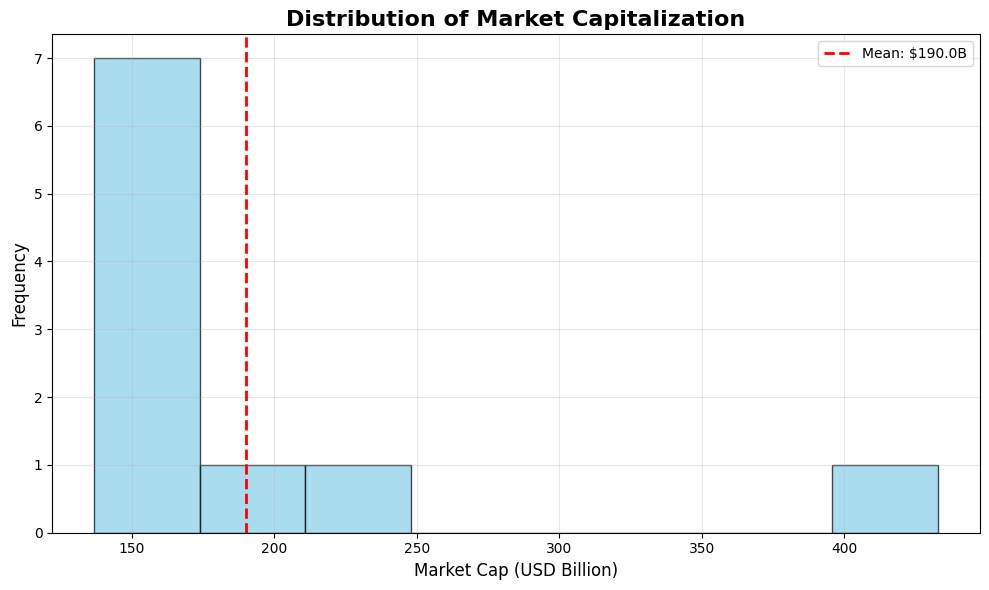

2025-08-23 23:39:33,008 - INFO - Market Cap distribution histogram created


In [19]:
# Distribution of Market Cap (US$ Billion)

# Set the style for seaborn
plt.style.use('default')
sns.set_palette("husl")

# Plot the distribution of market cap
plt.figure(figsize=(10,6))
plt.hist(bank_pandas_df['Market_Cap_USD_Billion'], bins=8, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Market Capitalization', fontsize=16, fontweight='bold')
plt.xlabel('Market Cap (USD Billion)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)

mean_cap = bank_pandas_df['Market_Cap_USD_Billion'].mean()
plt.axvline(mean_cap, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_cap:.1f}B')
plt.legend()

plt.tight_layout()
plt.show()

logger.info("Market Cap distribution histogram created")


##**3.3. Top 10 Banks** <font color = red>[5 Marks]</font> <br>

Identify the top 10 banks by market capitalization using a bar chart

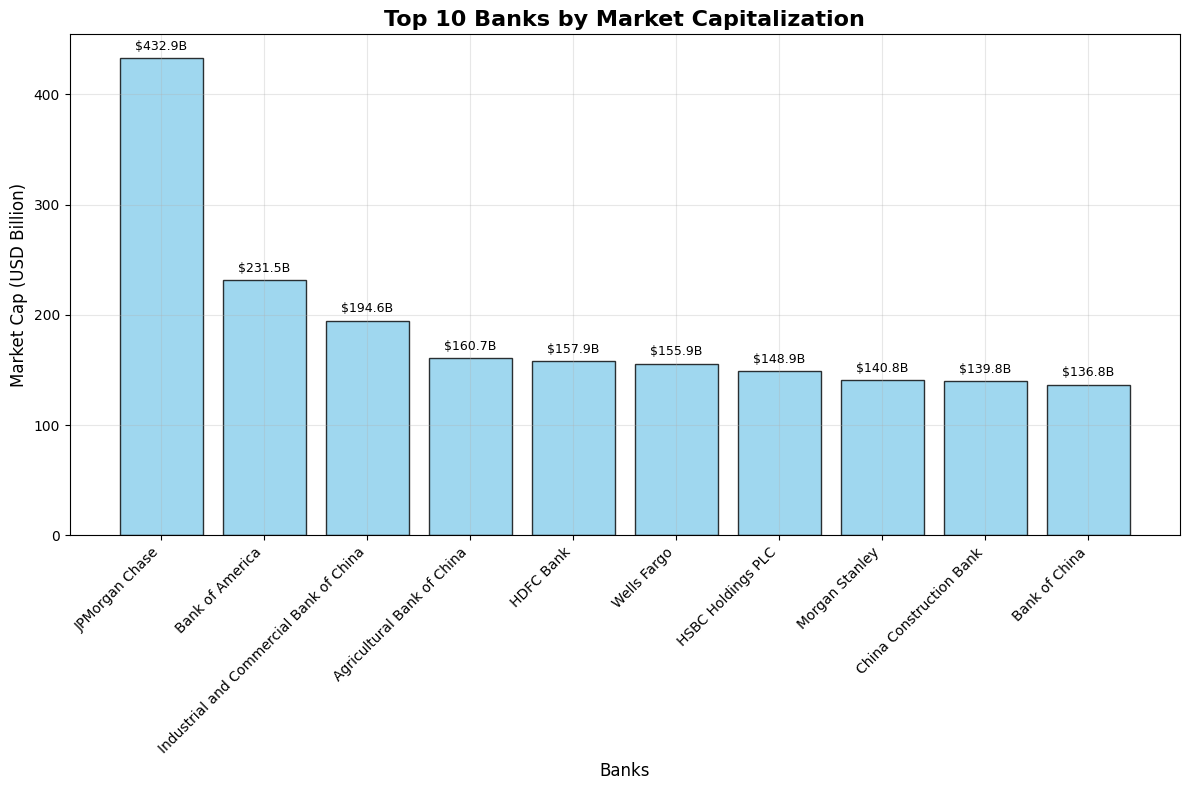

2025-08-23 23:47:42,423 - INFO - Top 10 banks bar chart created


In [ ]:
# Top 10 Banks by Market Cap

# Sort the DataFrame by market cap in descending order

# Plot the top 10 banks by market cap

# Since our dataset already contains top 10 banks, we'll sort and display them
bank_sorted = bank_pandas_df.sort_values('Market_Cap_USD_Billion', ascending=False)

# Creating a bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(bank_sorted)), bank_sorted['Market_Cap_USD_Billion'], 
               color='skyblue', alpha=0.8, edgecolor='black')

# Customizing the plot
plt.title('Top 10 Banks by Market Capitalization', fontsize=16, fontweight='bold')
plt.xlabel('Banks', fontsize=12)
plt.ylabel('Market Cap (USD Billion)', fontsize=12)
plt.xticks(range(len(bank_sorted)), bank_sorted['Bank_Name'], rotation=45, ha='right')

# Added value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5, 
             f'${height:.1f}B', ha='center', va='bottom', fontsize=9)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

logger.info("Top 10 banks bar chart created")


##**3.4. Market Cap vs Bank Ranking** <font color = red>[5 Marks]</font> <br>

Visualize the relationship between market capitalization and bank ranking using a scatter plot

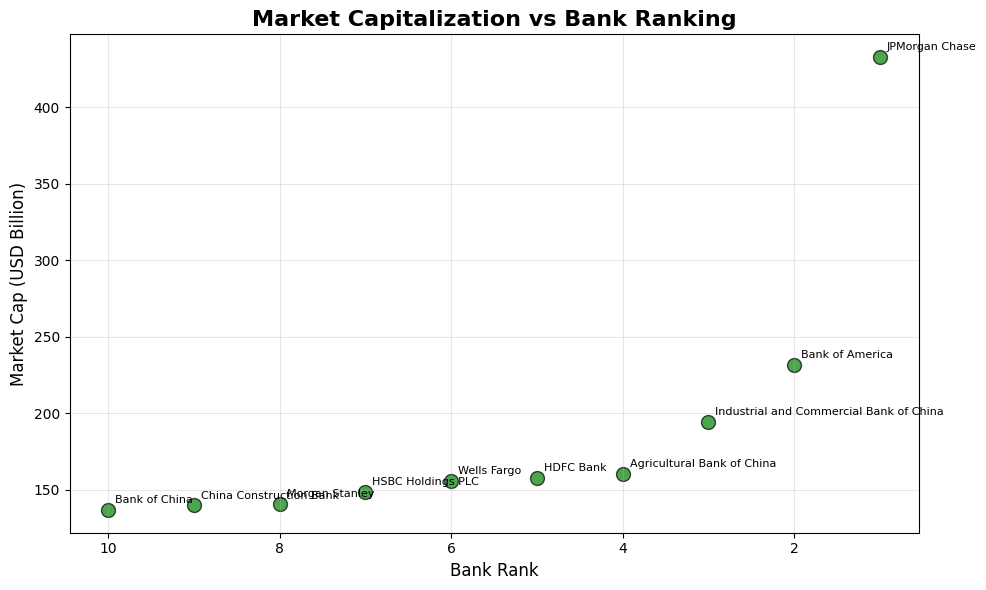

2025-08-23 23:49:32,839 - INFO - Market Cap vs Rank scatter plot created


In [22]:
# Market Cap vs Rank

# Plot market cap vs rank

# Creating a scatter plot showing relationship between rank and market cap
plt.figure(figsize=(10, 6))
plt.scatter(bank_pandas_df['Rank'], bank_pandas_df['Market_Cap_USD_Billion'], 
           s=100, color='green', alpha=0.7, edgecolors='black')

# Customizing the plot
plt.title('Market Capitalization vs Bank Ranking', fontsize=16, fontweight='bold')
plt.xlabel('Bank Rank', fontsize=12)
plt.ylabel('Market Cap (USD Billion)', fontsize=12)
plt.grid(True, alpha=0.3)

# Added bank names as labels for each point
for i, row in bank_pandas_df.iterrows():
    plt.annotate(row['Bank_Name'], 
                (row['Rank'], row['Market_Cap_USD_Billion']),
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, ha='left')

# Invert x-axis so rank 1 is on the left
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

logger.info("Market Cap vs Rank scatter plot created")


##**3.5. Market Cap Analysis** <font color = red>[5 Marks]</font> <br>

Use a boxplot to examine the spread and outliers in market capitalization.

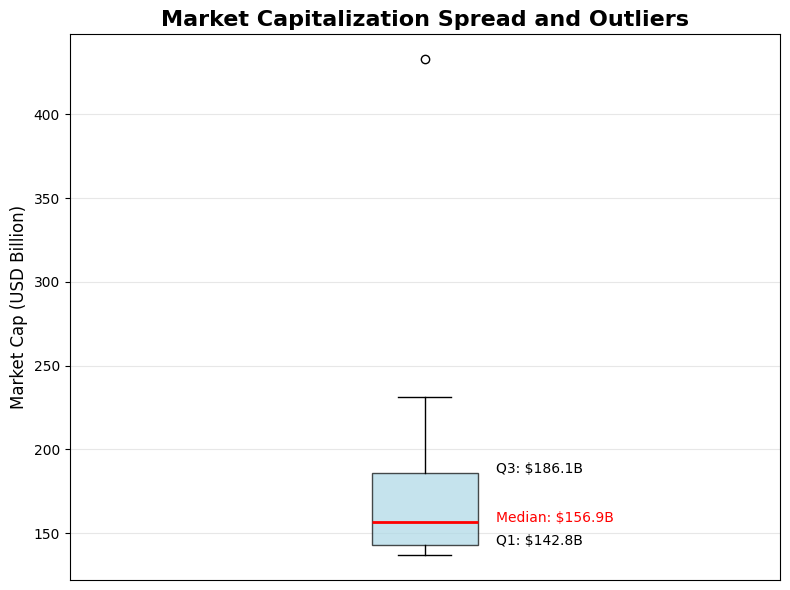

2025-08-23 23:50:43,983 - INFO - Market Cap boxplot created showing spread and outliers


In [23]:
# Boxplot of Market Cap
#To show the spread and outliers in the market capitalization data.

# Plot a boxplot of market cap

# Create boxplot
plt.figure(figsize=(8, 6))
box_plot = plt.boxplot(bank_pandas_df['Market_Cap_USD_Billion'], 
                      patch_artist=True, 
                      boxprops=dict(facecolor='lightblue', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2))

# Customize the plot
plt.title('Market Capitalization Spread and Outliers', fontsize=16, fontweight='bold')
plt.ylabel('Market Cap (USD Billion)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add some statistics as text
stats = bank_pandas_df['Market_Cap_USD_Billion'].describe()
plt.text(1.1, stats['75%'], f"Q3: ${stats['75%']:.1f}B", fontsize=10)
plt.text(1.1, stats['50%'], f"Median: ${stats['50%']:.1f}B", fontsize=10, color='red')
plt.text(1.1, stats['25%'], f"Q1: ${stats['25%']:.1f}B", fontsize=10)

# Remove x-axis labels since it's a single boxplot
plt.xticks([])

plt.tight_layout()
plt.show()

logger.info("Market Cap boxplot created showing spread and outliers")


##**3.6. Market Cap Quartile Distribution** <font color = red>[5 Marks]</font> <br>

Display the quartile distribution of market capitalization using a violin plot.

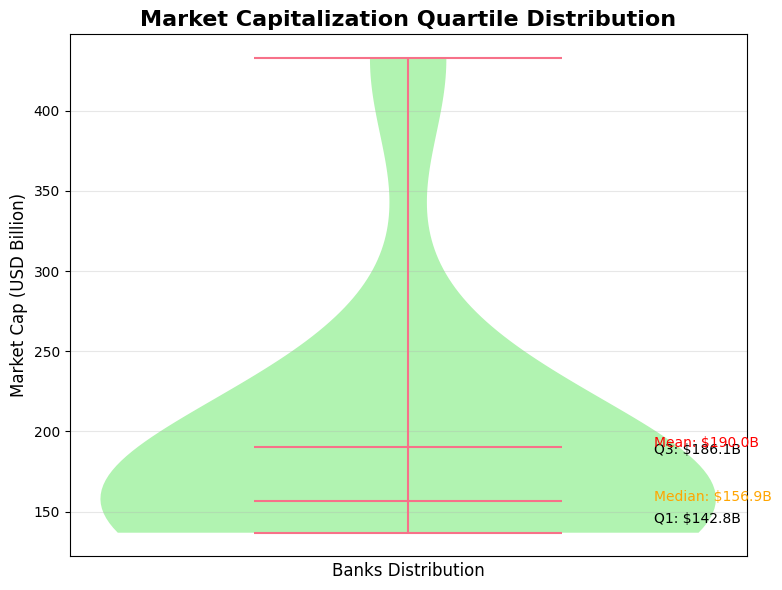

2025-08-23 23:51:38,534 - INFO - Market Cap violin plot created showing quartile distribution


In [24]:
# Market Cap Distribution by Quartile

# Create violin plot
plt.figure(figsize=(8, 6))
violin_parts = plt.violinplot([bank_pandas_df['Market_Cap_USD_Billion']], 
                             positions=[1], 
                             showmeans=True, 
                             showmedians=True)

# Customize violin plot colors
for pc in violin_parts['bodies']:
    pc.set_facecolor('lightgreen')
    pc.set_alpha(0.7)

# Customize the plot
plt.title('Market Capitalization Quartile Distribution', fontsize=16, fontweight='bold')
plt.ylabel('Market Cap (USD Billion)', fontsize=12)
plt.xlabel('Banks Distribution', fontsize=12)
plt.grid(True, alpha=0.3)

# Add quartile information as text
stats = bank_pandas_df['Market_Cap_USD_Billion'].describe()
plt.text(1.2, stats['75%'], f"Q3: ${stats['75%']:.1f}B", fontsize=10)
plt.text(1.2, stats['50%'], f"Median: ${stats['50%']:.1f}B", fontsize=10, color='orange')
plt.text(1.2, stats['25%'], f"Q1: ${stats['25%']:.1f}B", fontsize=10)
plt.text(1.2, stats['mean'], f"Mean: ${stats['mean']:.1f}B", fontsize=10, color='red')

# Remove x-axis ticks
plt.xticks([])

plt.tight_layout()
plt.show()

logger.info("Market Cap violin plot created showing quartile distribution")

##**3.7. Cumulative Market Share Analysis** <font color = red>[5 Marks]</font> <br>

Compute cumulative market share and visualize it with a line plot.

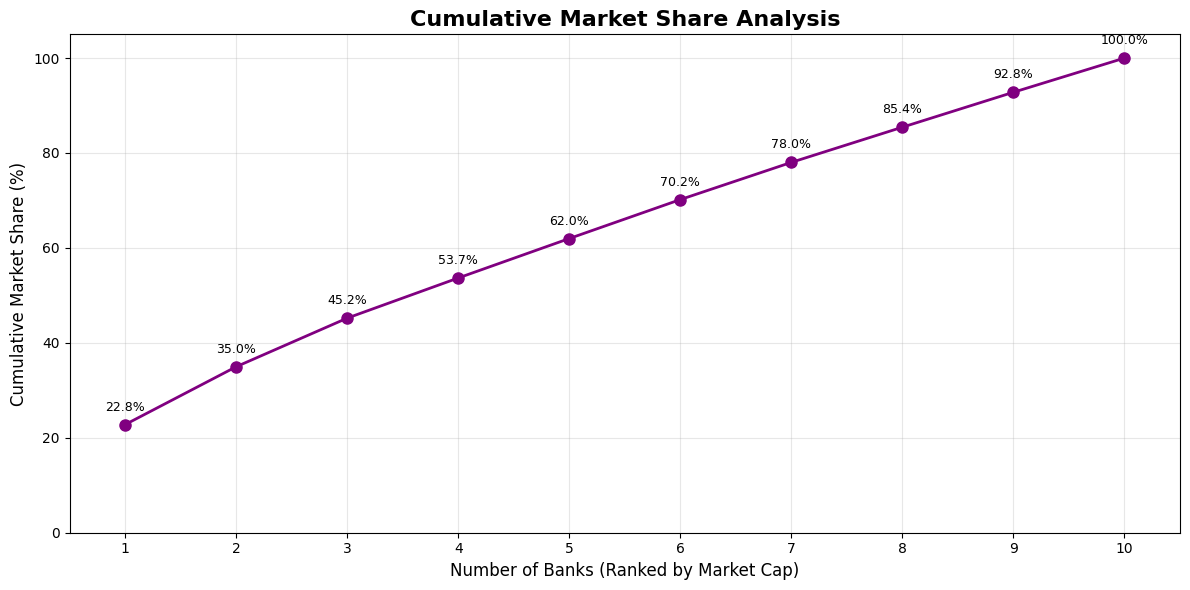

2025-08-23 23:52:36,785 - INFO - Cumulative market share analysis completed
2025-08-23 23:52:36,787 - INFO - Top 3 banks control 45.2% of market
2025-08-23 23:52:36,789 - INFO - Top 5 banks control 62.0% of market


In [25]:
# Cumulative Market Share

# Plot

# Sort banks by market cap (descending)
bank_sorted = bank_pandas_df.sort_values('Market_Cap_USD_Billion', ascending=False).reset_index(drop=True)

# Calculate total market cap and market share
total_market_cap = bank_sorted['Market_Cap_USD_Billion'].sum()
bank_sorted['Market_Share'] = (bank_sorted['Market_Cap_USD_Billion'] / total_market_cap) * 100
bank_sorted['Cumulative_Share'] = bank_sorted['Market_Share'].cumsum()

# Create line plot for cumulative market share
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(bank_sorted) + 1), bank_sorted['Cumulative_Share'], 
         marker='o', linewidth=2, markersize=8, color='purple')

# Customize the plot
plt.title('Cumulative Market Share Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Number of Banks (Ranked by Market Cap)', fontsize=12)
plt.ylabel('Cumulative Market Share (%)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add percentage labels on points
for i, row in bank_sorted.iterrows():
    plt.annotate(f'{row["Cumulative_Share"]:.1f}%', 
                (i+1, row['Cumulative_Share']), 
                xytext=(0, 10), textcoords='offset points', 
                ha='center', fontsize=9)

# Set axis limits
plt.xlim(0.5, 10.5)
plt.ylim(0, 105)
plt.xticks(range(1, 11))

plt.tight_layout()
plt.show()

# Log the analysis
logger.info("Cumulative market share analysis completed")
logger.info(f"Top 3 banks control {bank_sorted.iloc[2]['Cumulative_Share']:.1f}% of market")
logger.info(f"Top 5 banks control {bank_sorted.iloc[4]['Cumulative_Share']:.1f}% of market")

##**3.8. Categorising Banks** <font color = red>[5 Marks]</font> <br>

Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.

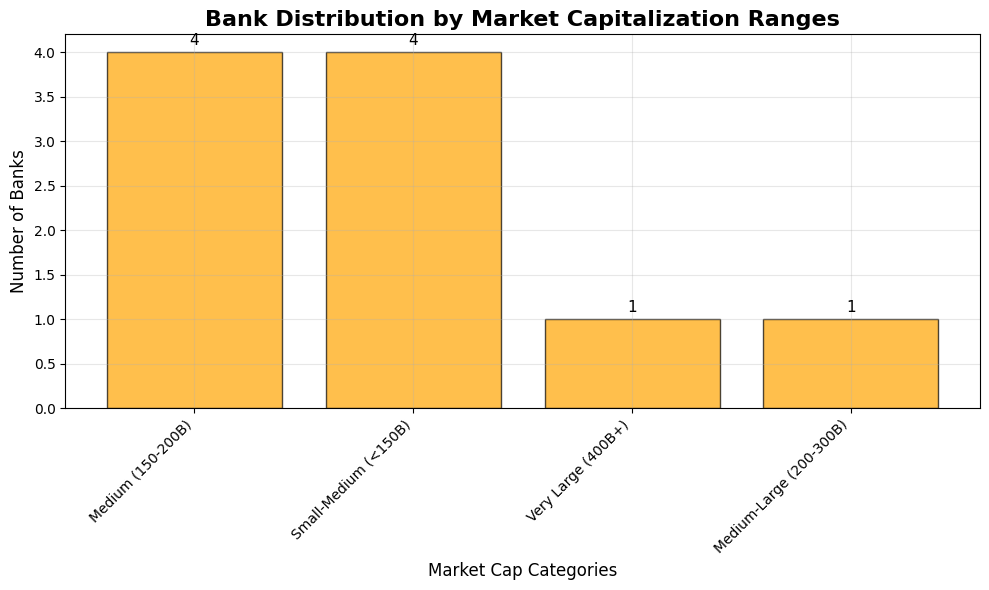

2025-08-23 23:53:59,754 - INFO - Market cap categorization completed:
2025-08-23 23:53:59,755 - INFO -   Medium (150-200B): 4 banks
2025-08-23 23:53:59,756 - INFO -   Small-Medium (<150B): 4 banks
2025-08-23 23:53:59,757 - INFO -   Very Large (400B+): 1 banks
2025-08-23 23:53:59,758 - INFO -   Medium-Large (200-300B): 1 banks


In [26]:
# Market Cap Range Distribution
# Create market cap ranges

# Plot

# Define market cap ranges based on our data
def categorize_market_cap(market_cap):
    if market_cap >= 400:
        return 'Very Large (400B+)'
    elif market_cap >= 300:
        return 'Large (300-400B)'
    elif market_cap >= 200:
        return 'Medium-Large (200-300B)'
    elif market_cap >= 150:
        return 'Medium (150-200B)'
    else:
        return 'Small-Medium (<150B)'

# Apply categorization
bank_pandas_df['Market_Cap_Category'] = bank_pandas_df['Market_Cap_USD_Billion'].apply(categorize_market_cap)

# Count banks in each category
category_counts = bank_pandas_df['Market_Cap_Category'].value_counts()

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts.values, 
               color='orange', alpha=0.7, edgecolor='black')

# Customize the plot
plt.title('Bank Distribution by Market Capitalization Ranges', fontsize=16, fontweight='bold')
plt.xlabel('Market Cap Categories', fontsize=12)
plt.ylabel('Number of Banks', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05, 
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# Log the categorization results
logger.info("Market cap categorization completed:")
for category, count in category_counts.items():
    logger.info(f"  {category}: {count} banks")

##**3.9. Visualise Market Share Distribution** <font color = red>[5 Marks]</font> <br>


Calculate and display market share distribution among the top 10 banks using a pie chart.

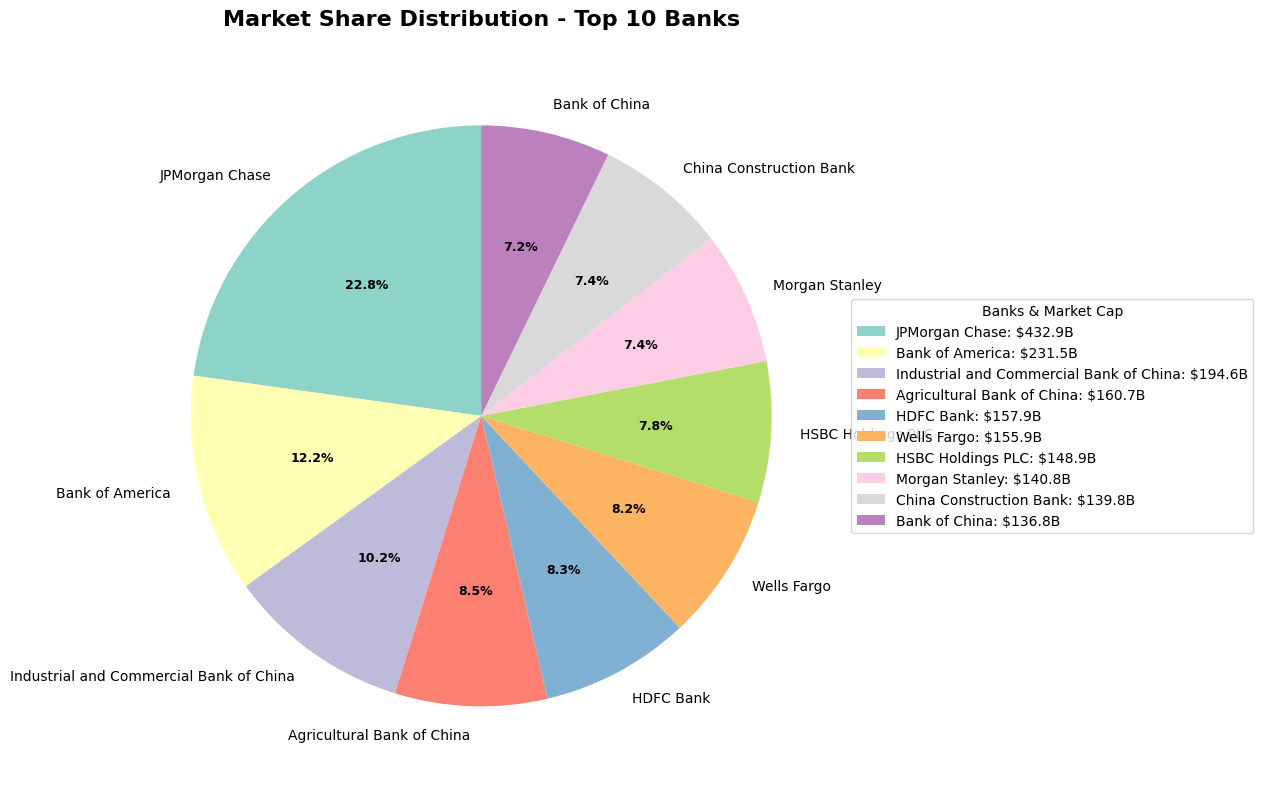

2025-08-23 23:54:58,039 - INFO - Market share distribution analysis:
2025-08-23 23:54:58,041 - INFO -   JPMorgan Chase: 22.8%
2025-08-23 23:54:58,042 - INFO -   Bank of America: 12.2%
2025-08-23 23:54:58,044 - INFO -   Industrial and Commercial Bank of China: 10.2%
2025-08-23 23:54:58,045 - INFO -   Agricultural Bank of China: 8.5%
2025-08-23 23:54:58,047 - INFO -   HDFC Bank: 8.3%
2025-08-23 23:54:58,048 - INFO -   Wells Fargo: 8.2%
2025-08-23 23:54:58,049 - INFO -   HSBC Holdings PLC: 7.8%
2025-08-23 23:54:58,052 - INFO -   Morgan Stanley: 7.4%
2025-08-23 23:54:58,053 - INFO -   China Construction Bank: 7.4%
2025-08-23 23:54:58,054 - INFO -   Bank of China: 7.2%


In [27]:
# Top 10 Banks Market Share
# Calculate market share percentage for top 10 banks

# Plot

# Calculate total market cap and individual market shares
total_market_cap = bank_pandas_df['Market_Cap_USD_Billion'].sum()
bank_pandas_df['Market_Share'] = (bank_pandas_df['Market_Cap_USD_Billion'] / total_market_cap) * 100

# Sort by market cap for better visualization
bank_sorted = bank_pandas_df.sort_values('Market_Cap_USD_Billion', ascending=False)

# Create pie chart
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(range(len(bank_sorted)))

wedges, texts, autotexts = plt.pie(bank_sorted['Market_Share'], 
                                  labels=bank_sorted['Bank_Name'], 
                                  autopct='%1.1f%%',
                                  colors=colors,
                                  startangle=90)

# Customize the plot
plt.title('Market Share Distribution - Top 10 Banks', fontsize=16, fontweight='bold', pad=20)

# Improve text readability
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(9)
    autotext.set_weight('bold')

# Add a legend with bank names and values
legend_labels = [f'{name}: ${cap:.1f}B' 
                for name, cap in zip(bank_sorted['Bank_Name'], bank_sorted['Market_Cap_USD_Billion'])]
plt.legend(wedges, legend_labels, title="Banks & Market Cap", 
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# Log market share analysis
logger.info("Market share distribution analysis:")
for _, row in bank_sorted.iterrows():
    logger.info(f"  {row['Bank_Name']}: {row['Market_Share']:.1f}%")

#**4. ETL and Querying** <font color = red>[45 marks]</font> <br>

In [ ]:
#Imports & Spark Session Initialization

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, round
import logging
from datetime import datetime
import sqlite3
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()

# Logging Configuration
logfile = "code_log.txt"

In [ ]:
#Logging Function

def log_progress(msg):
    timeformat = '%Y-%h-%d-%H:%M:%S'
    timestamp = datetime.now().strftime(timeformat)
    with open(logfile, 'a') as f:
        f.write(f"{timestamp} : {msg}\n")

In [ ]:
# Import required functions
from pyspark.sql.functions import col, avg, sum, count, desc, asc, round, lag, dense_rank, ntile, when, first, lead
from pyspark.sql.window import Window

# First, let's rename your columns to match our queries (if needed)

# Create window specifications


##**4.1. Market Capitalization Analysis** <font color = red>[3 marks]</font> <br>

Q: Perform Advanced Market Capitalization Analysis with Growth Metrics

In [ ]:
# Query: Advanced Market Cap Analysis with Growth Metrics


##4.2.**Market Concentration Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Market Concentration and Categorize Banks Based on Market Share Tiers

In [ ]:
# Market Concentration Analysis


##**4.3. Market Capitalization Distribution** <font color = red>[6 marks]</font> <br>

Q: Examine Statistical Distribution of Market Capitalization Using Quartile Analysis

In [ ]:
# Import required functions
from pyspark.sql.functions import (col, avg, sum, count, desc, asc, round, lag,
                                 dense_rank, ntile, when, first, lead, min, max, lit)
from pyspark.sql.window import Window

# Query 3: Statistical Distribution Analysis


##**4.4. Comparative Size Analysis** <font color = red>[6 marks]</font> <br>

Q: Conduct Comparative Size Analysis to Classify Banks by Relative Market Size

In [ ]:
# Comparative Size Analysis


##**4.5. Market Growth Analysis** <font color = red>[6 marks]</font> <br>

Q: Evaluate Market Growth and Identify Gaps Between Consecutive Banks

In [ ]:
# Growth and Gap Analysis


##**4.6. Market Dominance Analysis** <font color = red>[6 marks]</font> <br>

Q: Assess Market Dominance by Measuring Cumulative Share and Dominance Score

In [ ]:
# Market Dominance Analysis


##**4.7. Segment-Wise Bank Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges

In [ ]:
# Segment Performance Analysis


##**4.8. Performance Dashboard** <font color = red>[6 marks]</font> <br>

Q: Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics

In [ ]:
# Comprehensive Performance Dashboard



#5. Visualization Integration

In [ ]:
# Visualization Setup Section

# 1. Prepare data for visualization platforms
# 2. Generate Tableau connection instructions

# 3. Generate Power BI connection instructions

# 4. Execute visualization setup
# 5. Sample Dashboard Layout (Documentation)
